In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
font_path="malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### 성인 독서율 CSV 데이터 불러오기

In [3]:
file='종이책_독서율__성인__20230718181258.csv'

In [4]:
bookDF=pd.read_csv(file, encoding='cp949')

### 연도별로 '읽음' 컬럼으로 데이터 생성

In [5]:
bookDF.set_index('통계분류(1)')

,통계분류(2),2015,2015.1,2015.2,2017,2017.1,2017.2,2019,2019.1,2019.2,2021,2021.1,2021.2
통계분류(1),,,,,,,,,,,,,
통계분류(1),통계분류(2),사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음
연령별,19~29세,911,86.6,13.4,1070,73.5,26.5,1057,70.4,29.6,1016,60.3,39.7
가구소득별,500만원 이상,711,83.5,16.5,1035,72.4,27.6,1321,70.3,29.7,1464,54.8,45.2
학력별,대재 이상,2190,82.6,17.4,2878,73.1,26.9,2939,71.7,28.3,2964,57.7,42.3
연령별,30~39세,932,77.1,22.9,1071,68.9,31.1,1022,68.7,31.3,964,56.3,43.7
가구소득별,400~500만원 미만,987,72.3,27.7,1224,65.6,34.4,1290,57.9,42.1,1521,46,54
연령별,40~49세,1030,72.2,27.8,1218,61.9,38.1,1158,57.6,42.4,1123,44.4,55.6
가구소득별,300~400만원미만,1458,66.9,33.1,1768,58.8,41.2,1515,49.8,50.2,1412,39.3,60.7
성별,남성,2478,65.5,34.5,2988,58.2,41.8,2990,50.4,49.6,2991,40.4,59.6


In [14]:
DF=bookDF.loc[:, ['통계분류(1)','통계분류(2)','2015.1', '2017.1', '2019.1', '2021.1']]

In [15]:
DF.set_index('통계분류(1)', inplace=True)

In [16]:
sortDF=DF.sort_index()
sortDF

,통계분류(2),2015.1,2017.1,2019.1,2021.1
통계분류(1),,,,,
가구소득별,500만원 이상,83.5,72.4,70.3,54.8
가구소득별,200만원 미만,42.8,49.1,29.1,18.9
가구소득별,400~500만원 미만,72.3,65.6,57.9,46
가구소득별,300~400만원미만,66.9,58.8,49.8,39.3
가구소득별,200~300만원미만,61.9,52.5,45.6,28.2
성별,남성,65.5,58.2,50.4,40.4
성별,여성,65.2,61.5,53.9,41.1
연령별,19~29세,86.6,73.5,70.4,60.3
연령별,30~39세,77.1,68.9,68.7,56.3


### 통계분류(2)를 인덱스로 설정 후 소득별/연도별 독서율 데이터 생성

In [12]:
sortDF.set_index('통계분류(2)', inplace=True)
sortDF

,2015.1,2017.1,2019.1,2021.1
통계분류(2),,,,
500만원 이상,83.5,72.4,70.3,54.8
200만원 미만,42.8,49.1,29.1,18.9
400~500만원 미만,72.3,65.6,57.9,46
300~400만원미만,66.9,58.8,49.8,39.3
200~300만원미만,61.9,52.5,45.6,28.2
남성,65.5,58.2,50.4,40.4
여성,65.2,61.5,53.9,41.1
19~29세,86.6,73.5,70.4,60.3
30~39세,77.1,68.9,68.7,56.3


### 소득별 독서율 데이터

In [13]:
s1=sortDF[0:5].astype(float)
s1

,2015.1,2017.1,2019.1,2021.1
통계분류(2),,,,
500만원 이상,83.5,72.4,70.3,54.8
200만원 미만,42.8,49.1,29.1,18.9
400~500만원 미만,72.3,65.6,57.9,46.0
300~400만원미만,66.9,58.8,49.8,39.3
200~300만원미만,61.9,52.5,45.6,28.2


### 연령별 독서율 데이터

In [28]:
s2=sortDF[7:12]
s2.set_index('통계분류(2)', inplace=True)
s2

,2015.1,2017.1,2019.1,2021.1
통계분류(2),,,,
19~29세,86.6,73.5,70.4,60.3
30~39세,77.1,68.9,68.7,56.3
40~49세,72.2,61.9,57.6,44.4
60세 이상,36.9,47.8,31.5,22.7
50~59세,60.2,52.2,43.5,33.9


In [29]:
s2=s2[['2015.1', '2017.1', '2019.1', '2021.1']].astype(float)

In [30]:
s2

,2015.1,2017.1,2019.1,2021.1
통계분류(2),,,,
19~29세,86.6,73.5,70.4,60.3
30~39세,77.1,68.9,68.7,56.3
40~49세,72.2,61.9,57.6,44.4
60세 이상,36.9,47.8,31.5,22.7
50~59세,60.2,52.2,43.5,33.9


### 시각화

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


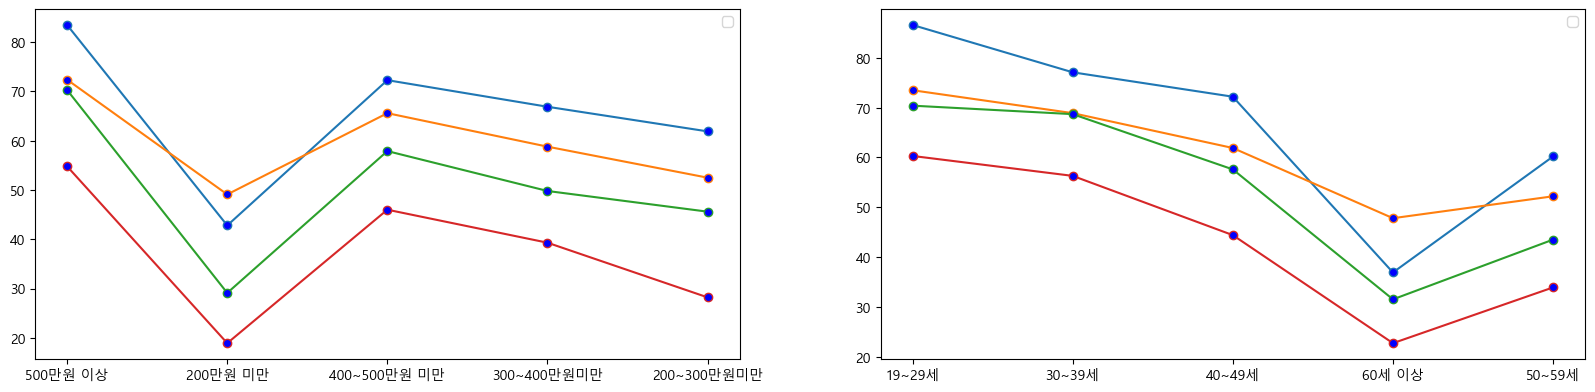

In [31]:
fig=plt.figure(figsize=(20,10))
ax1 =fig.add_subplot(2,2,1)
ax1.plot(s1, marker='o', markerfacecolor='blue')
ax1.legend(loc="best")
ax2 =fig.add_subplot(2,2,2)
ax2.plot(s2, marker='o', markerfacecolor='blue')
ax2.legend(loc="best")